In [1]:
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#1


P1 = np.array([[1/4, 3/4, 0, 0],
               [1/2, 0, 1/2, 0],
               [0, 1/2, 0, 1/2],
               [0, 0, 3/4, 1/4]])
P2 = np.array([[2/9, 1/3, 0, 4/9],
               [4/9, 1/9, 0, 4/9],
               [2/9, 2/9, 2/9, 1/3],
               [2/9, 2/9, 4/9, 1/9]])

P3 = np.array([[0, 1/2, 0, 1/2],
               [1/3, 0, 2/3, 0],
               [0, 1/4, 0, 3/4],
               [1/4, 0, 3/4, 0]])

def stat_dist(P):
  values, vectors = np.linalg.eig(P.T)
  idx = np.argmin(np.abs(values - 1))
  pi = np.abs(vectors[:, idx])
  pi /= pi.sum()
  print('Стационарное распределение для')
  print(P)
  print(pi)
  return pi

def exponentiate_matrix(P, powers):
    results = {}
    for power in powers:
        result = np.linalg.matrix_power(P, power)
        results[power] = result
    return results

powers = [5, 10, 20, 30, 50]

stat_dist(P1)
results_P1 = exponentiate_matrix(P1, powers)
for power, result in results_P1.items():
    print(f"Степень {power}:")
    print(result)
print()
print()


stat_dist(P2)
results_P2 = exponentiate_matrix(P2, powers)
for power, result in results_P2.items():
    print(f"Степень {power}:")
    print(result)
print()
print()

stat_dist(P3)
results_P3 = exponentiate_matrix(P3, powers)
for power, result in results_P3.items():
    print(f"Степень {power}:")
    print(result)
print()
print()

Стационарное распределение для
[[0.25 0.75 0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.75 0.25]]
[0.2 0.3 0.3 0.2]
Степень 5:
[[0.17675781 0.43066406 0.16992188 0.22265625]
 [0.28710938 0.14648438 0.453125   0.11328125]
 [0.11328125 0.453125   0.14648438 0.28710938]
 [0.22265625 0.16992188 0.43066406 0.17675781]]
Степень 10:
[[0.22371578 0.25403881 0.34596062 0.17628479]
 [0.16935921 0.36967659 0.23032379 0.23064041]
 [0.23064041 0.23032379 0.36967659 0.16935921]
 [0.17628479 0.34596062 0.25403881 0.22371578]]
Степень 20:
[[0.20394139 0.29141525 0.30858475 0.19605861]
 [0.19427683 0.31252614 0.28747386 0.20572317]
 [0.20572317 0.28747386 0.31252614 0.19427683]
 [0.19605861 0.30858475 0.29141525 0.20394139]]
Степень 30:
[[0.20071303 0.29844139 0.30155861 0.19928697]
 [0.19896093 0.30227164 0.29772836 0.20103907]
 [0.20103907 0.29772836 0.30227164 0.19896093]
 [0.19928697 0.30155861 0.29844139 0.20071303]]
Степень 50:
[[0.20002346 0.29994871 0.30005129 0.199976

Стационарное распределение для
[[0.33333333 0.33333333 0.33333333]
 [0.75       0.         0.25      ]
 [0.5        0.16666667 0.33333333]]
[0.47368421 0.21052632 0.31578947]
[0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0]
Доля посещений каждого состояния:
[0.4785 0.2079 0.3136]


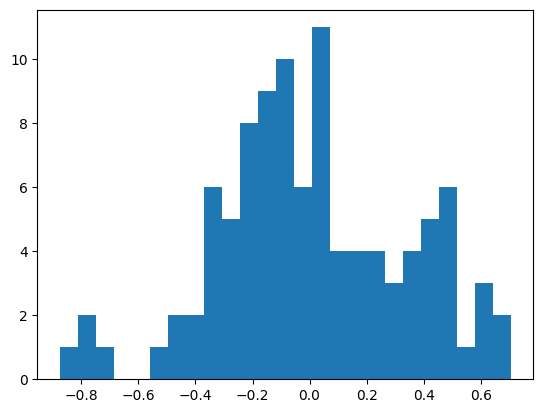

In [4]:
#2

P = np.array([[1/3, 1/3, 1/3],
              [3/4, 0, 1/4],
              [1/2, 1/6, 1/3]])

pi = stat_dist(P)

# Построение траектории
n_steps = 100
state = 0
trajectory = [state]

for _ in range(n_steps):
    state = np.random.choice(range(len(P)), p=P[state])
    trajectory.append(state)

print(trajectory)

state_visits = np.zeros(len(P))
state = 0
n_steps = 10000
for _ in range(n_steps):
  state = np.random.choice(range(len(P)), p=P[state])
  state_visits[state] += 1
state_visits /= n_steps

print("Доля посещений каждого состояния:")
print(state_visits)

n_steps = 1000
n_trajectories = 100
hist = []

for _ in range(n_trajectories):
  state = 0
  state_0_visits = 0
  for _ in range(n_steps):
    if state == 0:
      state_0_visits += 1
    state = np.random.choice(range(len(P)), p=P[state])
  state_0_visits /= n_steps
  hist.append(np.sqrt(n_steps)*(state_0_visits - pi[0]))

plt.hist(hist, bins=25)
plt.show()

In [5]:
lines = [
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0.166666666666667;0;0;0;0.166666666666667;0;0.166666666666667;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0.166666666666667;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.5;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.5;0;0;0',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0.25;0;0;0;0;0.25;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0.25;0;0;0;0;0.25;0;0;0;0',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0.166666666666667;0;0;0;0.166666666666667;0;0.166666666666667;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0.166666666666667;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.5;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0',
'0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0.25;0;0;0;0;0.25;0;0;0;0',
'0;0;0;0;0;0;0.25;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0;0;0;0;0.166666666666667;0;0;0;0.166666666666667;0;0.166666666666667;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0.166666666666667;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0.166666666666667;0;0;0;0.166666666666667;0;0.166666666666667;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0.166666666666667;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0.166666666666667;0;0;0;0.166666666666667;0;0.166666666666667;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0.166666666666667;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0.25;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0',
'1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0.25;0;0;0;0;0.25;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0.25;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0.111111111111111;0;0.111111111111111;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0;0.111111111111111;0;0;0.111111111111111;0;0.111111111111111',
'0;0;0.111111111111111;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0.111111111111111;0.111111111111111;0.111111111111111;0;0;0;0;0;0;0;0.111111111111111;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0.25;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.25;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.166666666666667;0;0;0;0.333333333333333;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.5;0;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0',
'0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0.2;0;0.2;0;0.2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0'
]

In [6]:
#3

def read_transition_matrix():
  n = len(lines)
  P = np.zeros((n, n))
  for i, line in enumerate(lines):
    row = [float(prob) for prob in line.strip().split(';')]
    P[i, :] = row
  return P

def find_classes(P):
  n = P.shape[0]
  visited = np.zeros(n)
  classes = []

  def dfs(node, current_class):
    visited[node] = 1
    current_class.append(node)
    for neighbor in range(n):
      if P[node, neighbor] > 0 and visited[neighbor] == 0:
        dfs(neighbor, current_class)

  for i in range(n):
    if visited[i] == 0:
      current_class = []
      dfs(i, current_class)
      classes.append(current_class)
  return classes

classes = find_classes(read_transition_matrix())
for i, class_ in enumerate(classes):
  print(f"Класс {i + 1}: {class_}")


Класс 1: [0, 37]
Класс 2: [1, 5, 2, 10, 14, 9, 7, 12, 26, 11, 13, 15, 28, 20, 19, 21, 30, 25, 27, 29, 35, 44, 47, 49, 32, 33, 34, 42, 43]
Класс 3: [3, 17, 48]
Класс 4: [4, 16, 18, 22, 41, 46]
Класс 5: [6, 24, 8, 36, 23, 40, 38, 45]
Класс 6: [31, 39]


In [7]:
#4

P = np.array([[0, 0, 1/2, 1/2],
              [0, 0, 0, 1],
              [1/2, 0, 0, 1/2],
              [1/3, 1/3, 1/3, 0]])

pi = stat_dist(P)

P_ = np.zeros_like(P)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        P_[i, j] = P[j][i]*pi[j] / pi[i]

pi_ = stat_dist(P_)

Стационарное распределение для
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
[0.25  0.125 0.25  0.375]
Стационарное распределение для
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
[0.25  0.125 0.25  0.375]


In [13]:
#5
import random


def Walk_1D(n, N):
    k = 0
    for _ in range(N):
      x = 0
      for i in range(n):
        sample = np.random.uniform(0,1)
        if sample < 0.5:
          x += 1
        else:
          x -= 1
        if x==0:
          k += 1
          break
    return k

# n - кол-во шагов
# N - кол-во инициализаций
n = 1000
N = 1000
print(Walk_1D(n, N))


def Walk_2D(n, N):
    k = 0
    for _ in range(N):
      x = 0
      y = 0
      for i in range(n):
        sample = random.randint(1, 4)
        if sample == 1:
            x += 1
        elif sample == 2:
            x -= 1
        elif sample == 3:
            y += 1
        else:
            y -= 1
      if x==0 and y==0:
        k += 1
    return k

# n - кол-во шагов
# N - кол-во инициализаций
n = 1000
N = 10000
k = Walk_2D(n, N)
print(k)


def Walk_3D(n, N):
    k = 0
    for _ in range(N):
      x = 0
      y = 0
      z = 0
      for i in range(n):
        sample = random.randint(1, 6)
        if sample == 1:
            x += 1
        elif sample == 2:
            x -= 1
        elif sample == 3:
            y += 1
        elif sample == 4:
            y -= 1
        elif sample == 5:
            z += 1
        else:
            z -= 1
      if x==0 and y==0 and z==0:
        k += 1
    return k

# n - кол-во шагов
# N - кол-во инициализаций
n = 10000
N = 1000
print(Walk_3D(n, N))

976
4
0
